<a href="https://colab.research.google.com/github/s2t2/pca-project-2022/blob/main/notebooks/PCA_Project_20221215_DELIVERABLE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Objectives

Analyze the athlete data using a principle component analysis.

*   How many principle components will you retain and why? 
*   What is the interpretation of the principle components that you retain? 
* What conclusions can you draw from the principle
component analysis regarding these athletes?



## Installations

In [ ]:
# https://www.pauldesalvo.com/how-to-download-plotly-express-charts-as-images-in-google-colab/
%%capture
!pip install kaleido
!pip install plotly>=4.0.0
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

## Imports

In [ ]:
import numpy as np
from pandas import read_csv, DataFrame

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

from plotly.express import line, scatter, scatter_3d, scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt

## Data Processing

### Data Loading

In [ ]:
raw_df = read_csv("https://raw.githubusercontent.com/s2t2/pca-project-2022/main/data/Athletes.csv")
raw_df.head()

,Athlets,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m
0,Sebrle,10.85,7.84,16.36,2.12,48.36,14.05,48.72,5.0,70.52,280.01
1,Clay,10.44,7.96,15.23,2.06,49.19,14.13,50.11,4.9,69.71,282.00
2,Karpov,10.50,7.81,15.93,2.09,46.81,13.97,51.65,4.6,55.54,278.11
3,Macey,10.89,7.47,15.73,2.15,48.97,14.56,48.34,4.4,58.46,265.42
4,Warners,10.62,7.74,14.48,1.97,47.97,14.01,43.73,4.9,55.39,278.05


### Data Cleaning

Rename and reorder columns:

In [ ]:
df = raw_df.copy()
df.rename(columns={
    "Athlets": "athlete",
    "Long.jump": "long_jump",
    "Shot.put": "shot_put",
    "High.jump": "high_jump",
    "110m.hurdle": "110m_hurdle",
    "Discus": "discus",
    "Pole.vault": "pole_vault",
    "Javeline": "javelin"
}, inplace=True)
df.index = df["athlete"]
df = df[["athlete", "shot_put", "discus", "javelin", "long_jump", "high_jump", "pole_vault", "100m", "400m", "1500m", "110m_hurdle",]]
df.head()

,athlete,shot_put,discus,javelin,long_jump,high_jump,pole_vault,100m,400m,1500m,110m_hurdle
athlete,,,,,,,,,,,
Sebrle,Sebrle,16.36,48.72,70.52,7.84,2.12,5.0,10.85,48.36,280.01,14.05
Clay,Clay,15.23,50.11,69.71,7.96,2.06,4.9,10.44,49.19,282.00,14.13
Karpov,Karpov,15.93,51.65,55.54,7.81,2.09,4.6,10.50,46.81,278.11,13.97
Macey,Macey,15.73,48.34,58.46,7.47,2.15,4.4,10.89,48.97,265.42,14.56
Warners,Warners,14.48,43.73,55.39,7.74,1.97,4.9,10.62,47.97,278.05,14.01


In [ ]:
df.describe()

,shot_put,discus,javelin,long_jump,high_jump,pole_vault,100m,400m,1500m,110m_hurdle
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,14.625000,44.375714,58.948929,7.265714,1.976429,4.732143,10.915714,49.610000,277.550714,14.553571
std,0.856221,3.299586,4.975849,0.341136,0.089947,0.289384,0.231027,1.268455,11.321826,0.442696
min,13.070000,39.830000,50.620000,6.610000,1.850000,4.200000,10.440000,46.810000,263.080000,13.970000
25%,13.977500,42.012500,55.360000,7.020000,1.932500,4.500000,10.837500,48.930000,270.690000,14.200000
50%,14.785000,44.505000,58.940000,7.280000,1.940000,4.700000,10.905000,49.370000,276.320000,14.400000
75%,15.170000,45.732500,61.000000,7.482500,2.037500,4.925000,11.080000,50.360000,280.432500,14.952500
max,16.360000,51.650000,70.520000,7.960000,2.150000,5.400000,11.360000,53.200000,317.000000,15.390000


### Feature Engineering (Inverse Time)

In [ ]:
# new features where faster time is a higher value (maximizing objective)
df["_100m"] = 1 / df["100m"]
df["_400m"] = 1 / df["400m"]
df["_1500m"] = 1 / df["1500m"]
df["_110m_hurdle"] = 1 / df["110m_hurdle"]

df[["100m", "_100m"]].sort_values(by=["100m"]).head()

,100m,_100m
athlete,,
Clay,10.44,0.095785
Karpov,10.50,0.095238
Averyanov,10.55,0.094787
Warners,10.62,0.094162
Ojaniemi,10.68,0.093633


In [ ]:
df[["100m", "_100m"]].sort_values(by=["_100m"], ascending=False).head()

,100m,_100m
athlete,,
Clay,10.44,0.095785
Karpov,10.50,0.095238
Averyanov,10.55,0.094787
Warners,10.62,0.094162
Ojaniemi,10.68,0.093633


### Feature Selection

In [ ]:
#features = ['shot_put', 'discus', 'javelin', 'long_jump', 'high_jump', 'pole_vault', '100m', '400m', '1500m', '110m_hurdle']
#print("FEATURES:", features)
#X = df[features]
#X

In [ ]:
features = ['shot_put', 'discus', 'javelin', 'long_jump', 'high_jump', 'pole_vault', 
                '_100m', '_400m', '_1500m', '_110m_hurdle']
print("FEATURES (INV TIME):", features)
X = df[features]
X

FEATURES (INV TIME): ['shot_put', 'discus', 'javelin', 'long_jump', 'high_jump', 'pole_vault', '_100m', '_400m', '_1500m', '_110m_hurdle']


,shot_put,discus,javelin,long_jump,high_jump,pole_vault,_100m,_400m,_1500m,_110m_hurdle
athlete,,,,,,,,,,
Sebrle,16.36,48.72,70.52,7.84,2.12,5.0,0.092166,0.020678,0.003571,0.071174
Clay,15.23,50.11,69.71,7.96,2.06,4.9,0.095785,0.020329,0.003546,0.070771
Karpov,15.93,51.65,55.54,7.81,2.09,4.6,0.095238,0.021363,0.003596,0.071582
Macey,15.73,48.34,58.46,7.47,2.15,4.4,0.091827,0.020421,0.003768,0.068681
Warners,14.48,43.73,55.39,7.74,1.97,4.9,0.094162,0.020846,0.003596,0.071378
Zsivoczky,15.31,45.62,63.45,7.14,2.12,4.7,0.091659,0.020243,0.003710,0.066890
Hernu,14.65,44.72,57.76,7.19,2.03,4.8,0.091158,0.020521,0.003783,0.070175
Nool,14.26,42.05,61.33,7.53,1.88,5.4,0.092593,0.020488,0.003619,0.067568
Bernard,14.80,44.75,55.27,7.48,2.12,4.4,0.093545,0.020354,0.003619,0.070572


### Correlation Matrix

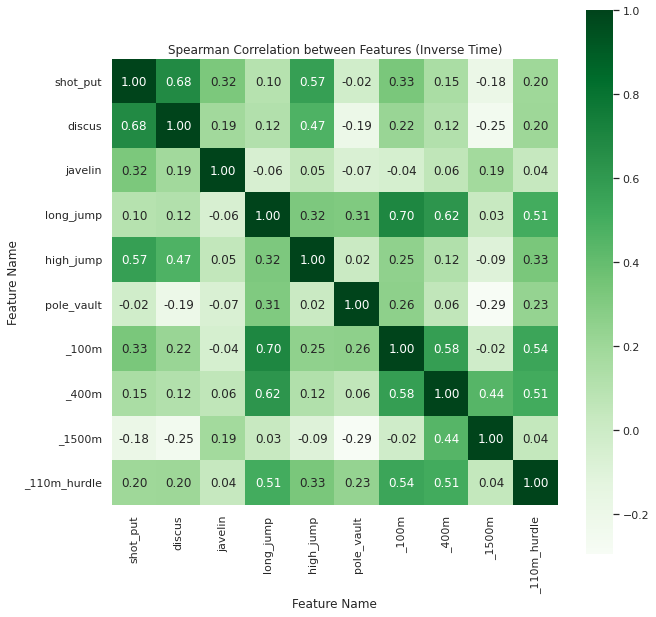

In [ ]:
mat = X.corr(method="spearman")

sns.set(rc = {'figure.figsize':(10,10)})

sns.heatmap(mat, 
            square=True, annot=True, fmt=".2f",
            cbar=True,
            cmap="Greens")

plt.xlabel("Feature Name")
plt.ylabel("Feature Name")
plt.title("Spearman Correlation between Features (Inverse Time)")

plt.show()

#mat

strength / agility features with highest correlation:
  + shotput and discus (68%)
  + shotput and high jump (57%)

the javelin is perhaps in its own category, but is most like the shot put.

<hr>

speed features with highest correlation:
  + 100m and long jump (70%)
  + 400m and long jump (62%)
  + 100m and 400m (58%)
  + 100m and 110m hurdles (54%)
  + 400m and 110m hurdles (51%)


the 1500 endurance event is moderately correlated with the next farthest event the 400m (44%)

the pole vault is perhaps in its own category, but is most like the long jump.


## PCA (Unscaled)

In [ ]:

unscaled_results = []
for n_components in range(1, len(features)+ 1):
    #print("-----------------")
    #print("N COMPONENTS:", n_components)

    pca = PCA(n_components=n_components, random_state=99)
    #print(pca)

    embeddings = pca.fit_transform(_X)
    #print("EMBEDDINGS:", embeddings.shape)
    #print("EXPLAINED VARIANCE RATIO:", pca.explained_variance_ratio_)
    #print("SINGULAR VALS:", pca.singular_values_)

    unscaled_results.append({
        "n_components": n_components,
        "explained_variance": pca.explained_variance_ratio_.sum()
    })
    
unscaled_results_df = DataFrame(unscaled_results)
unscaled_results_df

NameError: ignored

### Explained Variance (Unscaled)

In [ ]:
#from plotly.express import line
#
#fig = line(unscaled_results_df, x="n_components", y="explained_variance", 
#           title="Total Explained Variance by Number of Components (Inverse Time, Unscaled)",
#           markers="line+point"
#)
#fig.show()

In [ ]:
#from plotly.express import line
#
#fig = line(unscaled_results_df, x="n_components", y="explained_variance", 
#           title="Total Explained Variance by Number of Components (Inverse Time, Unscaled)",
#           markers="line+point"
#)
#fig.show()

### Scree Plot (Unscaled)

In [ ]:

#def pca_scree(X, n_components=10):
#    n_samples = X.shape[0]
#
#    # https://stackoverflow.com/a/31941631/670433
#    # We center the data and compute the sample covariance matrix.
#    X_centered = X - np.mean(X, axis=0)
#    cov_matrix = np.dot(X_centered.T, X_centered) / n_samples
#    print("COV MATRIX:", cov_matrix.shape)
#    #print(cov_matrix)
#
#    pca = PCA(n_components=n_components, random_state=99)
#    X_pca = pca.fit_transform(X)
#
#    eigenvalues = pca.explained_variance_
#    print("EIGENVALS:", eigenvalues.shape)
#    #print(eigenvalues)
#
#    eigenvectors = pca.components_
#    print("EIGENVECTORS:", eigenvectors.shape)
#    #print(eigenvectors)
#
#    print("----------------")
#    results = []
#    component_number = 1
#    for eigenvalue, eigenvector in zip(eigenvalues, eigenvectors):   
#        #print(eigenvalue)
#
#        myval = np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) 
#        #print(myval)
#        
#        results.append({"component": component_number, "eigenval": eigenvalue, "myval": myval})
#        component_number+=1
#        
#        #print("---")
#
#    return DataFrame(results)
#
#scree_df = pca_scree(X)
#scree_df

In [ ]:

#fig = line(scree_df, x="component", y=["eigenval", "myval"], 
#           title="Scree Plot of Eigenvalues by Component",
#           labels={"x": "Component", "y": "Eigenvalue"},
#           markers="line+point",
#)
#fig.show()

## PCA (Scaled)

We want to scale / normalize the X values so PCA will do better...

In [ ]:

pipeline_results = []
for n_components in range(1, len(features)+1):
    #print("-----------------")
    #print("N COMPONENTS:", n_components)

    #pca = PCA(n_components=n_components, random_state=99)
    #print(pca)
    pipeline = Pipeline(steps=[
        ("scaler", StandardScaler()),
        ("reducer", PCA(n_components=n_components, random_state=99))
    ])
    #print(pipeline)
    pca = pipeline.named_steps["reducer"]

    embeddings = pipeline.fit_transform(X)
    #print("COMPONENTS:", pca.components_.shape) # EIGEN VECTORS #> (2, 10)
    #print("FEATURE NAMES:", pca.feature_names_in_)
    #print("EMBEDDINGS:", embeddings.shape) #> (28, 2)
    #print("EXPLAINED VARIANCE:", pca.explained_variance_.shape) #> (2,)
    #print("EXPLAINED VARIANCE RATIO:", pca.explained_variance_ratio_.shape) #> (2,)
    #print("SINGULAR VALS:", pca.singular_values_.shape) #> (2,)

    # https://stackoverflow.com/a/44728692/670433
    loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
    # print("LOADINGS:", loadings.shape) #> (10, 2)

    #print("EIGENVAL:")
    pipeline_results.append({
        "n_components": n_components,
        "explained_variance": pca.explained_variance_ratio_.sum(),
        "eigenvals": pca.explained_variance_, # number of vals depend on n components
        "loadings": loadings,
        "embeddings": embeddings
    })

pipeline_results_df = DataFrame(pipeline_results)
pipeline_results_df


,n_components,explained_variance,eigenvals,loadings,embeddings
0,1,0.354772,[3.679120889426619],"[[0.6467389681876076], [0.5649214077334788], [...","[[3.7242906845024444], [3.6974343700583083], [..."
1,2,0.549777,"[3.679120889426619, 2.0222728788302615]","[[0.6467389681876076, 0.6279316716842193], [0....","[[3.7242906845024444, 1.5158276187519537], [3...."
2,3,0.692858,"[3.679120889426619, 2.0222728788302615, 1.4837...","[[0.6467389681876076, 0.6279316716842193, 0.02...","[[3.7242906845024444, 1.5158276187519537, -0.1..."
3,4,0.783496,"[3.679120889426619, 2.0222728788302615, 1.4837...","[[0.6467389681876076, 0.6279316716842193, 0.02...","[[3.7242906845024444, 1.5158276187519537, -0.1..."
4,5,0.839581,"[3.679120889426619, 2.0222728788302615, 1.4837...","[[0.6467389681876076, 0.6279316716842193, 0.02...","[[3.7242906845024444, 1.5158276187519537, -0.1..."
5,6,0.892984,"[3.679120889426619, 2.0222728788302615, 1.4837...","[[0.6467389681876076, 0.6279316716842193, 0.02...","[[3.7242906845024444, 1.5158276187519537, -0.1..."
6,7,0.936426,"[3.679120889426619, 2.0222728788302615, 1.4837...","[[0.6467389681876076, 0.6279316716842193, 0.02...","[[3.7242906845024444, 1.5158276187519537, -0.1..."
7,8,0.973086,"[3.679120889426619, 2.0222728788302615, 1.4837...","[[0.6467389681876076, 0.6279316716842193, 0.02...","[[3.7242906845024444, 1.5158276187519537, -0.1..."
8,9,0.989737,"[3.679120889426619, 2.0222728788302615, 1.4837...","[[0.6467389681876076, 0.6279316716842193, 0.02...","[[3.7242906845024444, 1.5158276187519537, -0.1..."
9,10,1.000000,"[3.679120889426619, 2.0222728788302615, 1.4837...","[[0.6467389681876076, 0.6279316716842193, 0.02...","[[3.7242906845024444, 1.5158276187519537, -0.1..."


### Explained Variance

In [ ]:
pipeline_results_df[["n_components", "explained_variance"]]

,n_components,explained_variance
0,1,0.354772
1,2,0.549777
2,3,0.692858
3,4,0.783496
4,5,0.839581
5,6,0.892984
6,7,0.936426
7,8,0.973086
8,9,0.989737
9,10,1.000000


In [ ]:
fig = line(pipeline_results_df, x="n_components", y="explained_variance", 
        title="Total Explained Variance by Number of Components (Scaled, Inverse Time)",
        markers="line+point", color_discrete_sequence=["#47992D"]
)
fig.show()

### Scree Plot

In [ ]:
# let's examine the eigenvals where all features are present:


In [ ]:

eigenvals = pipeline_results_df.sort_values(by=["n_components"], ascending=False).iloc[0]["eigenvals"]
print("EIGENVALS:", eigenvals)

component_numbers = list(range(1, len(pipeline_results_df)+1))
print("COMPONENT NUMBERS:", component_numbers)

fig = line(x=component_numbers, y=eigenvals, 
        title="Scree Plot of Eigenvalues by Component (Scaled, Inverse Time)",
        labels={"x": "Component Number", "y": "Eigenvalue"},
        markers="line+point", color_discrete_sequence=["#47992D"]
)
fig.show()
# RETAIN ALL BEFORE THE ELBOW

EIGENVALS: [3.67912089 2.02227288 1.48379797 0.93994873 0.58162889 0.55380045
 0.45051157 0.38017869 0.17267587 0.10643444]
COMPONENT NUMBERS: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


almost linear after 5, so keep 4? 3? 2?

the eigenvalues above one are the first three only! 

let's keep three.


# PCA Pipeline (N Components)

In [ ]:
def plot_loadings(loadings_df, n_components, component_names):
    # n_components = n_components or len(component_names)
    #n_components = len(loadings_df.columns)
    #component_names = loadings_df.columns.tolist()

    title=f"PCA Loadings (n_components={n_components})"
    
    chart_df = loadings_df.copy()
    chart_df["event_name"] = chart_df.index
    if n_components == 2:
        #chart_df["color"] = np.abs(chart_df["component_1"]) * np.abs(chart_df["component_2"])
        fig = scatter(chart_df, x="component_1", y="component_2",
            title=title, text="event_name", #, color="color",
            color_discrete_sequence=["#47992D"]
        )
        fig.show()
        fig.write_html(f"{n_components}_component_loadings.html")
    elif n_components == 3:
        #chart_df["color"] = np.abs(chart_df["component_1"]) #* np.abs(chart_df["component_2"]) * (np.abs(chart_df["component_3"])
        fig = scatter_3d(chart_df, x="component_1", y="component_2", z="component_3",
            title=title, text="event_name", #, color="color"
            color_discrete_sequence=["#47992D"]
        )
        fig.show()
        fig.write_html(f"{n_components}_component_loadings.html")

        # TWO DIMENSION COMBOS

        title = f"PCA Loadings Comparison (n_components={n_components})"
        fig = scatter(chart_df, x="component_1", y="component_2",
            title=title, text="event_name", #, color="color"
            color_discrete_sequence=["#47992D"]
        )
        fig.show()
        fig.write_image(f"{n_components}_component_loadings_1_2.png")
        fig.write_html(f"{n_components}_component_loadings_1_2.html")

        fig = scatter(chart_df, x="component_1", y="component_3",
            title=title, text="event_name", #, color="color"
            color_discrete_sequence=["#47992D"]
        )
        fig.show()
        fig.write_image(f"{n_components}_component_loadings_1_3.png")
        fig.write_html(f"{n_components}_component_loadings_1_3.html")

        fig = scatter(chart_df, x="component_2", y="component_3",
            title=title, text="event_name", #, color="color"
            color_discrete_sequence=["#47992D"]
        )
        fig.show()
        fig.write_image(f"{n_components}_component_loadings_2_3.png")
        fig.write_html(f"{n_components}_component_loadings_2_3.html")

    ## SCATTER MATRIX NOT THE MOST HELPFUL UNLESS WE CAN SEE THE LABELS (NOT SHOWING UP?)
    ##chart_df["color"] = np.abs(chart_df["component_1"]) #* np.abs(chart_df["component_2"]) * (np.abs(chart_df["component_3"])
    #fig = scatter_matrix(chart_df, 
    #    #mode="markers+text", labels="event_name", #color="color",
    #    dimensions=component_names,
    #    title=f"PCA Loadings Comparison (n_components={n_components})",
    #    color_discrete_sequence=["#47992D"]
    #)
    #fig.show()


In [ ]:

def plot_embeddings(embeddings_df):
    n_components = len(embeddings_df.columns)
    component_names = embeddings_df.columns.tolist()

    title=f"PCA Embeddings (n_components={n_components})"
    
    chart_df = embeddings_df.copy()
    chart_df["athlete_name"] = chart_df.index
    
    if n_components == 2:        
        fig = scatter(chart_df, x="component_1", y="component_2",
            title=title, text="athlete_name", #, color="color"
            color_discrete_sequence=["#47992D"]
        )
        fig.show()
        fig.write_html(f"{n_components}_component_embeddings.html")
    elif n_components == 3:  

        fig = scatter_3d(chart_df, x="component_1", y="component_2", z="component_3",
            title=title, text="athlete_name", #, color="color"
            color_discrete_sequence=["#47992D"]
        )
        fig.show()
        fig.write_html(f"{n_components}_component_embeddings.html")
        
        # TWO DIMENSION COMBOS

        fig = scatter(chart_df, x="component_1", y="component_2",
            title=title, text="athlete_name", #, color="color"
            color_discrete_sequence=["#47992D"]
        )
        fig.show()
        filename = f"{n_components}_component_embeddings_1_2"
        fig.write_image(f"{filename}.png")
        fig.write_html(f"{filename}.html")
        
        fig = scatter(chart_df, x="component_1", y="component_3",
            title=title, text="athlete_name", #, color="color"
            color_discrete_sequence=["#47992D"]
        )
        fig.show()
        filename = f"{n_components}_component_embeddings_1_3"
        fig.write_image(f"{filename}.png")
        fig.write_html(f"{filename}.html")

        fig = scatter(chart_df, x="component_2", y="component_3",
            title=title, text="athlete_name", #, color="color"
            color_discrete_sequence=["#47992D"]
        )
        fig.show()
        filename = f"{n_components}_component_embeddings_2_3"
        fig.write_image(f"{filename}.png")
        fig.write_html(f"{filename}.html")


    # MATRIX FOR ALL
    #fig = scatter_matrix(chart_df, 
    #        #mode="markers+text", labels="athlete_name", #color="color",
    #        title=f"PCA Embeddings Comparison (n_components={n_components})",
    #        dimensions=component_names,
    #        color_discrete_sequence=["#47992D"]
    #)
    #fig.show()


In [ ]:

def pca_pipe(X=X, features=features, n_components=3, verbose=False):
    
    pipeline = Pipeline(steps=[
        ("scaler", StandardScaler()),
        ("reducer", PCA(n_components=n_components, random_state=99))
    ])
    pca = pipeline.named_steps["reducer"]

    embeddings = pipeline.fit_transform(X[features])
    
    eigenvals = pca.explained_variance_
    eigenvectors = pca.components_

    # https://stackoverflow.com/a/44728692/670433
    loadings = eigenvectors.T * np.sqrt(eigenvals)

    if verbose:
        print("-----------------")
        print("N COMPONENTS:", n_components)
        print(pipeline)
        print("ATHLETES:", len(X))
        #print(X.index)
        print("EMBEDDINGS:", embeddings.shape) #> (28, 2)
        print(embeddings)
        print("COMPONENTS / EIGENVECTORS:", eigenvectors.shape) # EIGEN VECTORS #> (2, 10)
        print(eigenvectors)
        #print("FEATURE NAMES:", pca.feature_names_in_)
        print("EXPLAINED VARIANCE / EIGENVALS:", eigenvals.shape) #> (2,)
        print(eigenvals)
        print("EXPLAINED VARIANCE RATIO:", pca.explained_variance_ratio_.shape) #> (2,)
        print(pca.explained_variance_ratio_)
        #print("SINGULAR VALS:", pca.singular_values_.shape) #> (2,)
        #print(pca.singular_values_.shape)
        print("LOADINGS:", loadings.shape) #> (10, 2)
        print(loadings)

    component_names = [f"component_{i}" for i in range(1, n_components+1)]
    loadings_df = DataFrame(loadings, columns=component_names, index=features)
    embeddings_df = DataFrame(embeddings, columns=component_names, index=X.index)
    athlete_embeddings_df = X.merge(embeddings_df, left_index=True, right_index=True)

    # LOADINGS CHART
    plot_loadings(loadings_df, n_components, component_names)

    # EMBEDDINGS CHART
    plot_embeddings(embeddings_df)

    return {
        "athletes": X.index,
        "feature_names_in": features,
        #"feature_names_out": feature_names_out,
        "n_components": n_components,
        "explained_variance": pca.explained_variance_ratio_.sum(),
        "eigenvals": eigenvals, # number of vals depend on n components
        "eigenvectors": eigenvectors,
        #"loadings": loadings,
        "loadings_df": loadings_df,
        #"embeddings": embeddings,
        "embeddings_df": athlete_embeddings_df, #embeddings_df,
    }




## PCA Pipeline (n=2)

In [ ]:
pca2_results = pca_pipe(n_components=2, verbose=True)

-----------------
N COMPONENTS: 2
Pipeline(steps=[('scaler', StandardScaler()),
                ('reducer', PCA(n_components=2, random_state=99))])
ATHLETES: 28
EMBEDDINGS: (28, 2)
[[ 3.72429068  1.51582762]
 [ 3.69743437  0.83925246]
 [ 4.37901042  0.31434557]
 [ 1.92531483  1.33408292]
 [ 1.95135083 -1.76508864]
 [ 0.68622403  1.28373905]
 [ 0.68289924 -0.53861766]
 [ 0.14021063 -1.74982195]
 [ 1.595589    0.12681735]
 [-0.13362752 -1.46210641]
 [ 0.25336177  0.62695901]
 [-0.15705306 -0.2602525 ]
 [-0.31227895  0.40475286]
 [ 0.48609886  1.14015797]
 [ 0.19542663 -1.74476975]
 [ 0.09667539 -0.77736768]
 [-0.67820484 -1.06577989]
 [-0.76927971 -0.16137098]
 [-0.44442073 -3.1347721 ]
 [-1.34628885  1.91646661]
 [-0.90946287  0.29078241]
 [-0.68078436 -1.07950405]
 [-1.83595442  0.2271372 ]
 [-2.62995978 -1.56027195]
 [-2.350385   -0.16247985]
 [-1.4186652   1.74017447]
 [-2.9306027   0.18130058]
 [-3.21691869  3.52040734]]
COMPONENTS / EIGENVECTORS: (2, 10)
[[ 0.33717627  0.29452082  

In [ ]:
pca2_results.keys()

dict_keys(['athletes', 'feature_names_in', 'n_components', 'explained_variance', 'eigenvals', 'eigenvectors', 'loadings_df', 'embeddings_df'])

In [ ]:
pca2_results["eigenvectors"]

array([[ 0.33717627,  0.29452082,  0.1507493 ,  0.42043788,  0.33407623,
         0.09213893,  0.42176836,  0.38968218,  0.09797832,  0.37501903],
       [ 0.44156283,  0.46954881,  0.24741512, -0.24163362,  0.33332394,
        -0.23229431, -0.18695971, -0.35274839, -0.33399883, -0.17011483]])

In [ ]:
pca2_results["loadings_df"]

,component_1,component_2
shot_put,0.646739,0.627932
discus,0.564921,0.667730
javelin,0.289153,0.351841
long_jump,0.806443,-0.343619
high_jump,0.640793,0.474009
pole_vault,0.176732,-0.330338
_100m,0.808995,-0.265869
_400m,0.747451,-0.501632
_1500m,0.187933,-0.474969
_110m_hurdle,0.719325,-0.241915


In [ ]:
pca2_results["embeddings_df"]

,shot_put,discus,javelin,long_jump,high_jump,pole_vault,_100m,_400m,_1500m,_110m_hurdle,component_1,component_2
athlete,,,,,,,,,,,,
Sebrle,16.36,48.72,70.52,7.84,2.12,5.0,0.092166,0.020678,0.003571,0.071174,3.724291,1.515828
Clay,15.23,50.11,69.71,7.96,2.06,4.9,0.095785,0.020329,0.003546,0.070771,3.697434,0.839252
Karpov,15.93,51.65,55.54,7.81,2.09,4.6,0.095238,0.021363,0.003596,0.071582,4.379010,0.314346
Macey,15.73,48.34,58.46,7.47,2.15,4.4,0.091827,0.020421,0.003768,0.068681,1.925315,1.334083
Warners,14.48,43.73,55.39,7.74,1.97,4.9,0.094162,0.020846,0.003596,0.071378,1.951351,-1.765089
Zsivoczky,15.31,45.62,63.45,7.14,2.12,4.7,0.091659,0.020243,0.003710,0.066890,0.686224,1.283739
Hernu,14.65,44.72,57.76,7.19,2.03,4.8,0.091158,0.020521,0.003783,0.070175,0.682899,-0.538618
Nool,14.26,42.05,61.33,7.53,1.88,5.4,0.092593,0.020488,0.003619,0.067568,0.140211,-1.749822
Bernard,14.80,44.75,55.27,7.48,2.12,4.4,0.093545,0.020354,0.003619,0.070572,1.595589,0.126817


## PCA Pipeline (n=3)

In [ ]:
pca3_results = pca_pipe(n_components=3, verbose=True)

-----------------
N COMPONENTS: 3
Pipeline(steps=[('scaler', StandardScaler()),
                ('reducer', PCA(n_components=3, random_state=99))])
ATHLETES: 28
EMBEDDINGS: (28, 3)
[[ 3.72429068  1.51582762 -0.17391753]
 [ 3.69743437  0.83925246  0.37847003]
 [ 4.37901042  0.31434557  0.3082288 ]
 [ 1.92531483  1.33408292 -1.34234655]
 [ 1.95135083 -1.76508864  0.89567798]
 [ 0.68622403  1.28373905 -1.05475887]
 [ 0.68289924 -0.53861766 -0.81872326]
 [ 0.14021063 -1.74982195  1.03410112]
 [ 1.595589    0.12681735 -0.12758669]
 [-0.13362752 -1.46210641  0.74845428]
 [ 0.25336177  0.62695901  1.81892194]
 [-0.15705306 -0.2602525   0.61048835]
 [-0.31227895  0.40475286 -1.69119392]
 [ 0.48609886  1.14015797 -1.5763814 ]
 [ 0.19542663 -1.74476975  0.49297126]
 [ 0.09667539 -0.77736768 -0.18487133]
 [-0.67820484 -1.06577989 -1.31795472]
 [-0.76927971 -0.16137098 -1.01183129]
 [-0.44442073 -3.1347721   0.8688472 ]
 [-1.34628885  1.91646661 -0.65464473]
 [-0.90946287  0.29078241  2.41470491]


In [ ]:
pca3_results["eigenvals"]

array([3.67912089, 2.02227288, 1.48379797])

In [ ]:
pca3_results["eigenvectors"].T # 3 rows by 10 columns (T: 3 columns 10 rows)

array([[ 0.33717627,  0.44156283,  0.0181291 ],
       [ 0.29452082,  0.46954881,  0.01193066],
       [ 0.1507493 ,  0.24741512, -0.42240298],
       [ 0.42043788, -0.24163362,  0.12661305],
       [ 0.33407623,  0.33332394, -0.0122427 ],
       [ 0.09213893, -0.23229431,  0.52956451],
       [ 0.42176836, -0.18695971,  0.20085832],
       [ 0.38968218, -0.35274839, -0.1995505 ],
       [ 0.09797832, -0.33399883, -0.66547306],
       [ 0.37501903, -0.17011483,  0.03829542]])

In [ ]:
pca3_results["loadings_df"]

,component_1,component_2,component_3
shot_put,0.646739,0.627932,0.022083
discus,0.564921,0.667730,0.014533
javelin,0.289153,0.351841,-0.514534
long_jump,0.806443,-0.343619,0.154229
high_jump,0.640793,0.474009,-0.014913
pole_vault,0.176732,-0.330338,0.645069
_100m,0.808995,-0.265869,0.244668
_400m,0.747451,-0.501632,-0.243075
_1500m,0.187933,-0.474969,-0.810621
_110m_hurdle,0.719325,-0.241915,0.046648


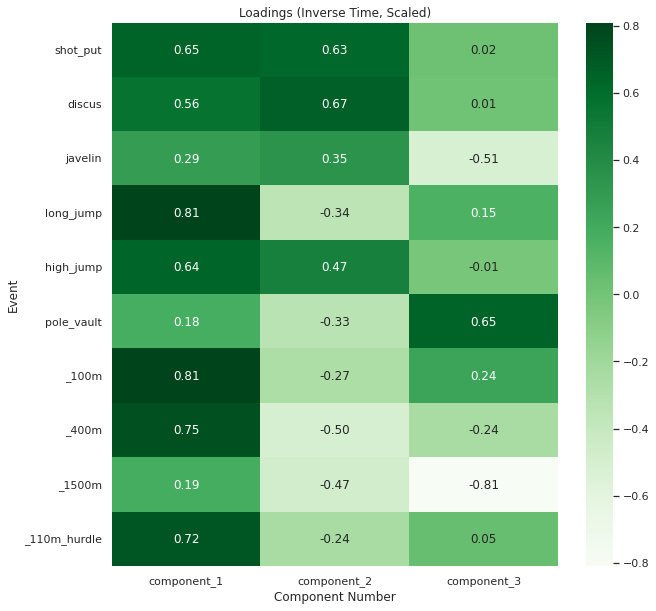

In [ ]:

sns.set(rc = {'figure.figsize':(10,10)})

sns.heatmap(pca3_results["loadings_df"], 
            square=False, annot=True, fmt=".2f",
            cbar=True,
            cmap="Greens")

plt.xlabel("Component Number")
plt.ylabel("Event")
plt.title("Loadings (Inverse Time, Scaled)")

plt.show()

In [ ]:
pca3_results["embeddings_df"]["discus"].head(3)

athlete
Sebrle    48.72
Clay      50.11
Karpov    51.65
Name: discus, dtype: float64

In [ ]:
#normalized_embeddings = pca3_results["embeddings_df"].div(pca3_results["embeddings_df"].max(axis=1), axis=0)
normalized_embeddings = pca3_results["embeddings_df"].copy()
normalized_embeddings.drop(columns=["component_1", "component_2", "component_3"], inplace=True)
for column_name in normalized_embeddings.columns:
    print(column_name)
    normalized_embeddings[column_name] = normalized_embeddings[column_name] / normalized_embeddings[column_name].max()

normalized_embeddings.head(3)

shot_put
discus
javelin
long_jump
high_jump
pole_vault
_100m
_400m
_1500m
_110m_hurdle


,shot_put,discus,javelin,long_jump,high_jump,pole_vault,_100m,_400m,_1500m,_110m_hurdle
athlete,,,,,,,,,,
Sebrle,1.000000,0.943272,1.000000,0.984925,0.986047,0.925926,0.962212,0.967949,0.939538,0.994306
Clay,0.930929,0.970184,0.988514,1.000000,0.958140,0.907407,1.000000,0.951616,0.932908,0.988677
Karpov,0.973716,1.000000,0.787578,0.981156,0.972093,0.851852,0.994286,1.000000,0.945957,1.000000


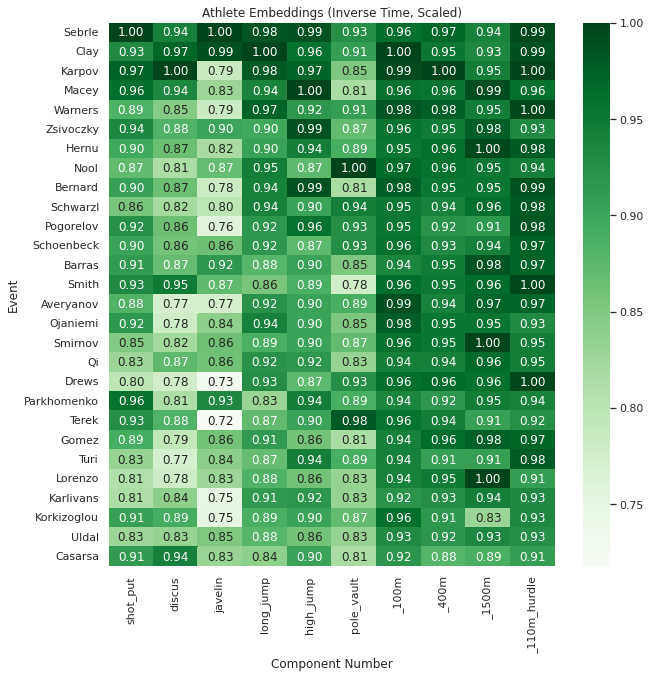

In [ ]:

sns.set(rc = {'figure.figsize':(10,10)})

sns.heatmap(normalized_embeddings, 
            square=False, annot=True, fmt=".2f",
            cbar=True,
            cmap="Greens")

plt.xlabel("Component Number")
plt.ylabel("Event")
plt.title("Athlete Embeddings (Inverse Time, Scaled)")

plt.show()

In [ ]:
pca3_results["embeddings_df"].to_csv(f"3_component_embeddings.csv")